
# Fighter Jet recognizer
The goal of this project is to classify 26 different types of Fighter Aircrafts around the world. The types are following: <br/>
1. General Dynamics F-16 Fighting Falcon aircraft
2. Mikoyan MiG-29
3. Dassault Rafale
4. Lockheed Martin F-22 Raptor
5. Mikoyan Mig-31
6. Sukhoi Su-27
7. Lockheed Martin F-35 Lightning II
8. KAI KF-21 Boramae
9. Sukhoi Su-57
10. Shenyang FC-31 Gyrfalcon
11. Boeing F-15EX Eagle II
12. Eurofighter Typhoon
13. AIDC F-CK-1 Ching-kuo
14. Lockheed YF-12
15. Mikoyan MiG-31
16. McDonnell Douglas F-4 Phantom II
17. Grumman F-14 Tomcat
18. English Electric Lightning
19. Focke-Wulf Fw 190
20. Mikoyan-Gurevich MiG-25
21. Lockheed P-80 Shooting Star
22. Sukhoi Su-34
23. Chengdu J-20
24. Sukhoi Su-35
25. Chengdu J-10
26. Mikoyan MiG-35

# Setting Up Necessary Things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [2]:
!pip install -Uqq fastai fastbook nbdev

In [3]:
pip install fastbook

Note: you may need to restart the kernel to use updated packages.


In [2]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
pip install nbdev

# Download Images from Browser

You can download images from Google Image Search and Bing Image Search. You can try it out in your own time. You might need to build a scraper or use their API. <br/>

For ease, we are going to use **DuckDuckGo Image Search**. <br/>

**Good news!** Fastai has a function to do this for us.

In [5]:
doc(search_images_ddg)

In [5]:
aircraft_labels = [
    "General Dynamics F-16 Fighting Falcon aircraft",
    "Dassault Rafale",
    "Lockheed Martin F-22 Raptor",
     "Mikoyan Mig-31",
    "Mikoyan Mig-29",
    "Sukhoi Su-27",
    "Lockheed Martin F-35 Lightning II",
    "Chengdu J-20 Mighty Dragon ",
    "KAI KF-21 Boramae",
    "Sukhoi Su-57",
    "Shenyang FC-31 Gyrfalcon",
    "Boeing F-15EX Eagle II",
    "Eurofighter Typhoon",
    "AIDC F-CK-1 Ching-kuo",
    "Lockheed YF-12",
    "Mikoyan MiG-31",
    "McDonnell Douglas F-4 Phantom II",
    "Grumman F-14 Tomcat",
    "English Electric Lightning",
    "Focke-Wulf Fw 190",
    "Mikoyan-Gurevich MiG-25",
    "Lockheed P-80 Shooting Star",
    'Sukhoi Su-34',
"Chengdu J-20",
"Sukhoi Su-35",
"Chengdu J-10 ",
"Mikoyan MiG-35 "

]
len(aircraft_labels)

27

In [6]:
images = search_images_ddg(aircraft_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://wallup.net/wp-content/uploads/2018/09/25/608425-vehicle-aircraft-military_aircraft-General_Dynamics_F-16_Fighting_Falcon.jpg'

In [8]:
doc(download_url)

In [11]:
dest = "aircraft.jpg"
download_url(images[0], dest, show_progress=False)

Path('aircraft.jpg')

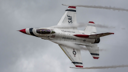

In [12]:
image = Image.open(dest)
image.to_thumb(128, 128)

## Combine all of them

In [15]:
data_path = "data10"
if not os.path.exists(data_path): 
  os.mkdir(data_path)

for cap_type in cap_labels:

  dest = f"{data_path}/{cap_type}"
  if not os.path.exists(dest): 
    os.mkdir(dest)

  try:
    cap_image_urls = search_images_ddg(cap_type)
    download_images(dest, urls = cap_image_urls)
    
  except:
    continue

In [16]:
image_counts = get_image_files(data_path)
image_counts

(#3805) [Path('data10/AIDC F-CK-1 Ching-kuo/000682c6-fc57-4081-a785-e239149968fc.JPG'),Path('data10/AIDC F-CK-1 Ching-kuo/00c1a5fc-dcf9-4e2b-993b-9e2333bcd200.jpg'),Path('data10/AIDC F-CK-1 Ching-kuo/02c2646c-2d8d-4419-8af0-1807247b8b2c.jpg'),Path('data10/AIDC F-CK-1 Ching-kuo/02d0adf2-f271-4275-a631-dcda6c92ba77.png'),Path('data10/AIDC F-CK-1 Ching-kuo/036a5bf5-421c-4de1-bf61-704bf741c978.jpg'),Path('data10/AIDC F-CK-1 Ching-kuo/064560eb-41e4-4216-9a36-8a27fda182ca.jpg'),Path('data10/AIDC F-CK-1 Ching-kuo/06f3d7d6-520f-4378-83e3-92d240e674a1.jpg'),Path('data10/AIDC F-CK-1 Ching-kuo/07f26dce-0fab-4dbd-a2ed-c34eec449745.jpg'),Path('data10/AIDC F-CK-1 Ching-kuo/0897e812-4587-42f4-aced-eec86bf97d8f.jpg'),Path('data10/AIDC F-CK-1 Ching-kuo/0aebba5d-8c39-492a-8990-86863aacd2ff.jpg')...]

In [17]:
failed = verify_images(image_counts)
failed

(#9) [Path('data10/Chengdu J-10 (China)/00617022-1446-4290-a746-3146c7f75e84.jpg'),Path('data10/Chengdu J-10 (China)/3fd1e8b0-d21c-465b-ba2a-e55880e2951b.jpg'),Path('data10/Chengdu J-10 (China)/ab758276-d34d-4daf-b2c2-b6f57e65d822.jpg'),Path('data10/Chengdu J-10 (China)/c5be6bc0-5fa3-494d-990b-e2022105c481.jpg'),Path('data10/Chengdu J-10 (China)/da3bfb67-f34e-4ea0-ae30-b26fedf4a6b8.jpg'),Path('data10/Chengdu J-20 (China)/2b55af48-738e-4c21-8f2a-3d4b1e42cda3.jpg'),Path('data10/Chengdu J-20 (China)/2b8e7320-667c-4b84-bb72-a4a65cd5325f.jpg'),Path('data10/Chengdu J-20 (China)/5e1d8fd8-6e3b-4b2e-8e77-b2ad4eb83a3a.jpg'),Path('data10/Sukhoi Su-35 (Russia)/771d5def-9de8-496e-b6b8-36a71e82d60c.jpg')]

In [18]:
failed.map(Path.unlink)

(#9) [None,None,None,None,None,None,None,None,None]

# From Data to Data Loaders

In [60]:
doc(get_image_files)

In [13]:
data_path=Path("data10")

In [14]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [15]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

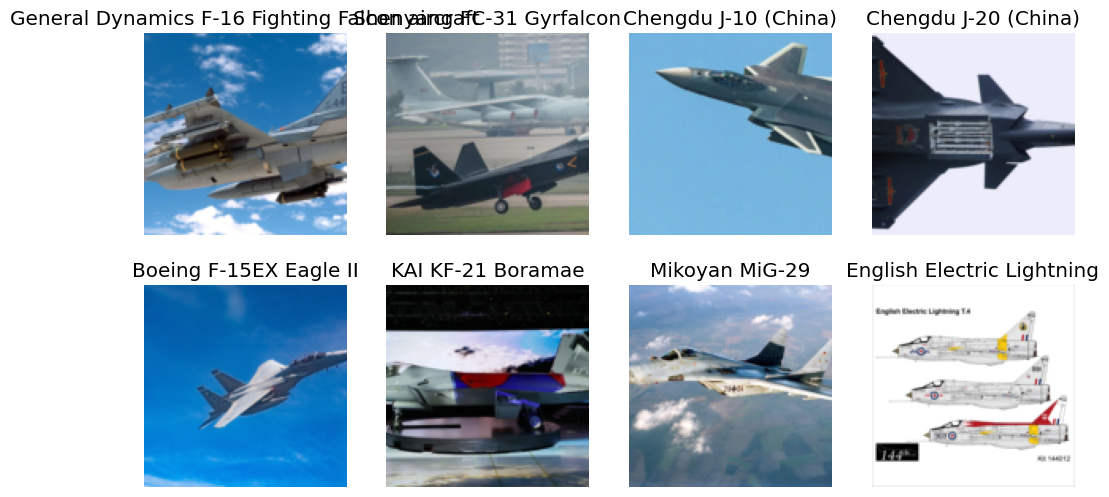

In [16]:
dls.train.show_batch(max_n=8, nrows=2)

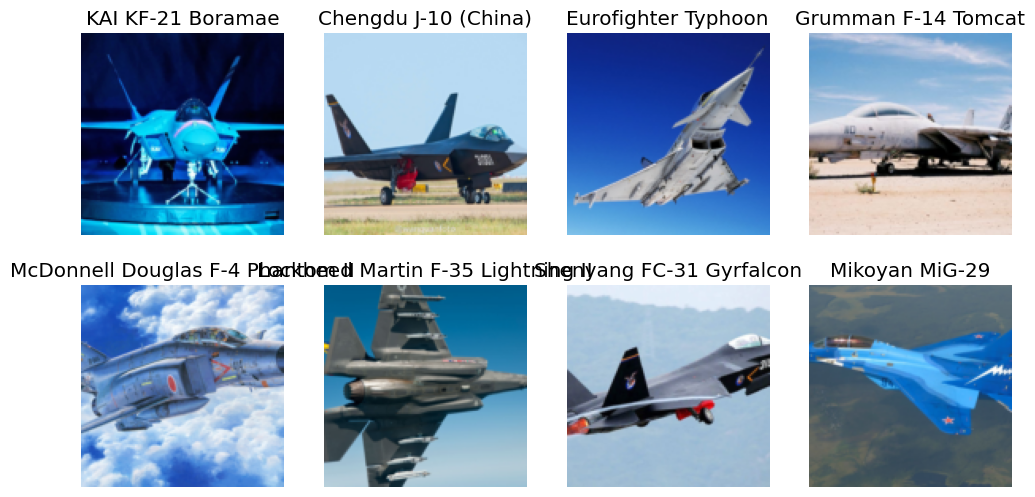

In [17]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

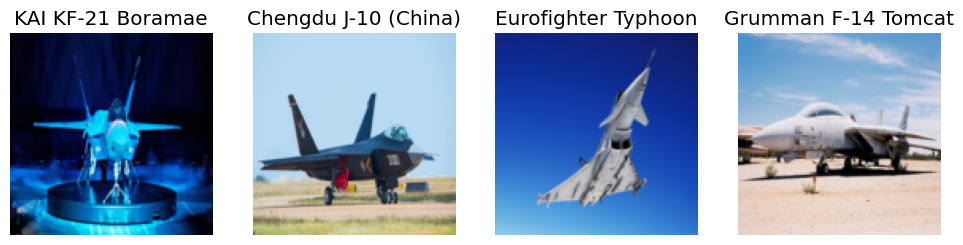

In [18]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

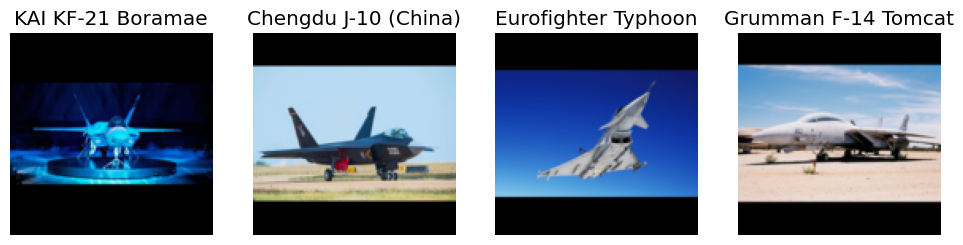

In [19]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

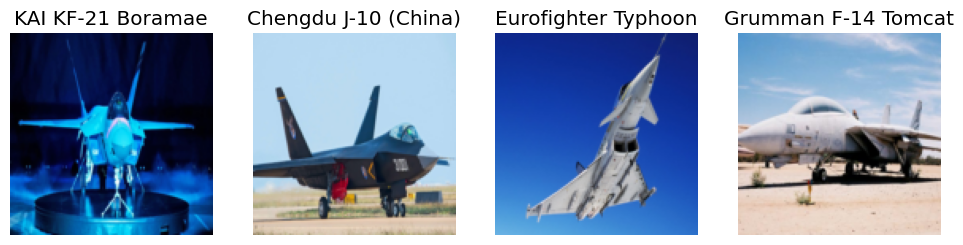

In [20]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [21]:
doc(aug_transforms)

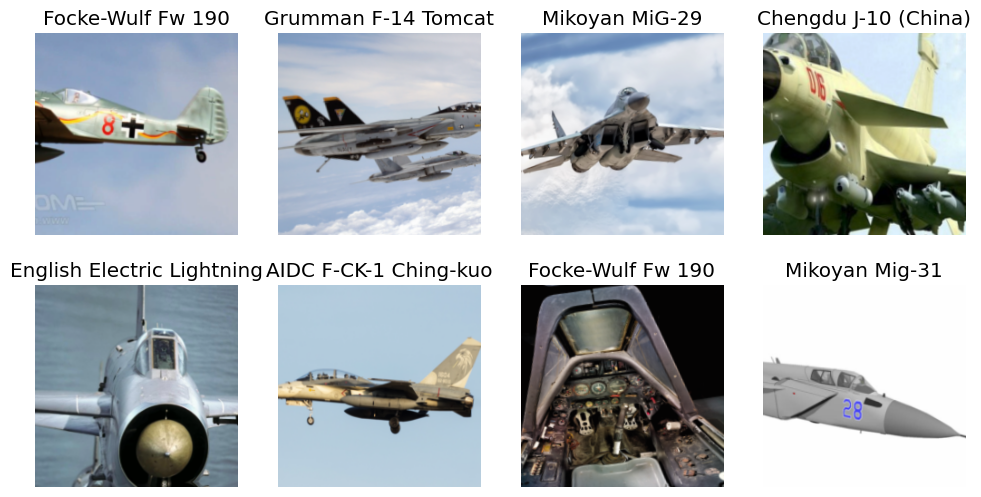

In [22]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [23]:
torch.save(dls, "Data_prep.pkl")